# Loading library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Preprocessing

In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [7]:
df[['species']] = le.fit_transform(df[['species']])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# split x and y

In [9]:
X = df.drop('species', axis = 1)
y = df['species']

# train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Apply Decision Tree Classifier on X_train and y_train

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()    ## by default gini index method is used
dtc

DecisionTreeClassifier()

In [12]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=dtc.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

##### The accuracy obtain from the decision tree classifier is 97.77%

# Plot the tree

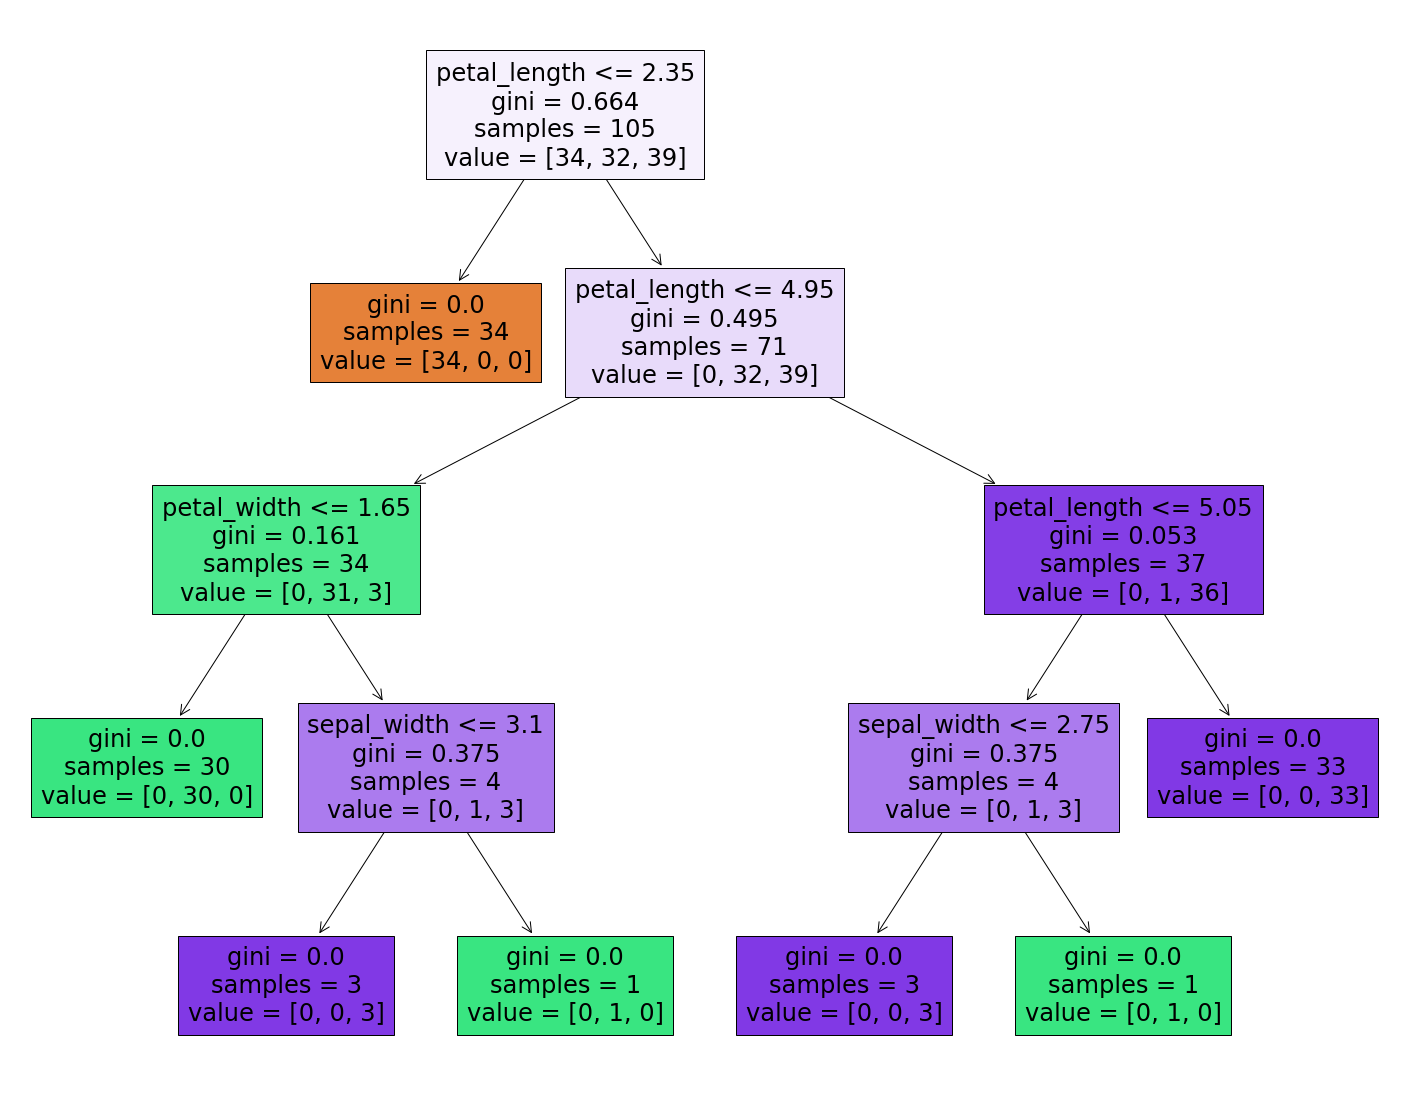

In [15]:
## Set the figure size
fig = plt.figure(figsize = (25, 20))

## plot the tree
from sklearn.tree import plot_tree
plot_tree(dtc, feature_names = X.columns, filled = True)
plt.show()

# Use the max_depth parameter in Decision Tree Classifier to control tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc_md = DecisionTreeClassifier(max_depth = 3)
dtc_md

DecisionTreeClassifier(max_depth=3)

In [17]:
dtc_md.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
y_pred_md=dtc_md.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_md)

0.9777777777777777

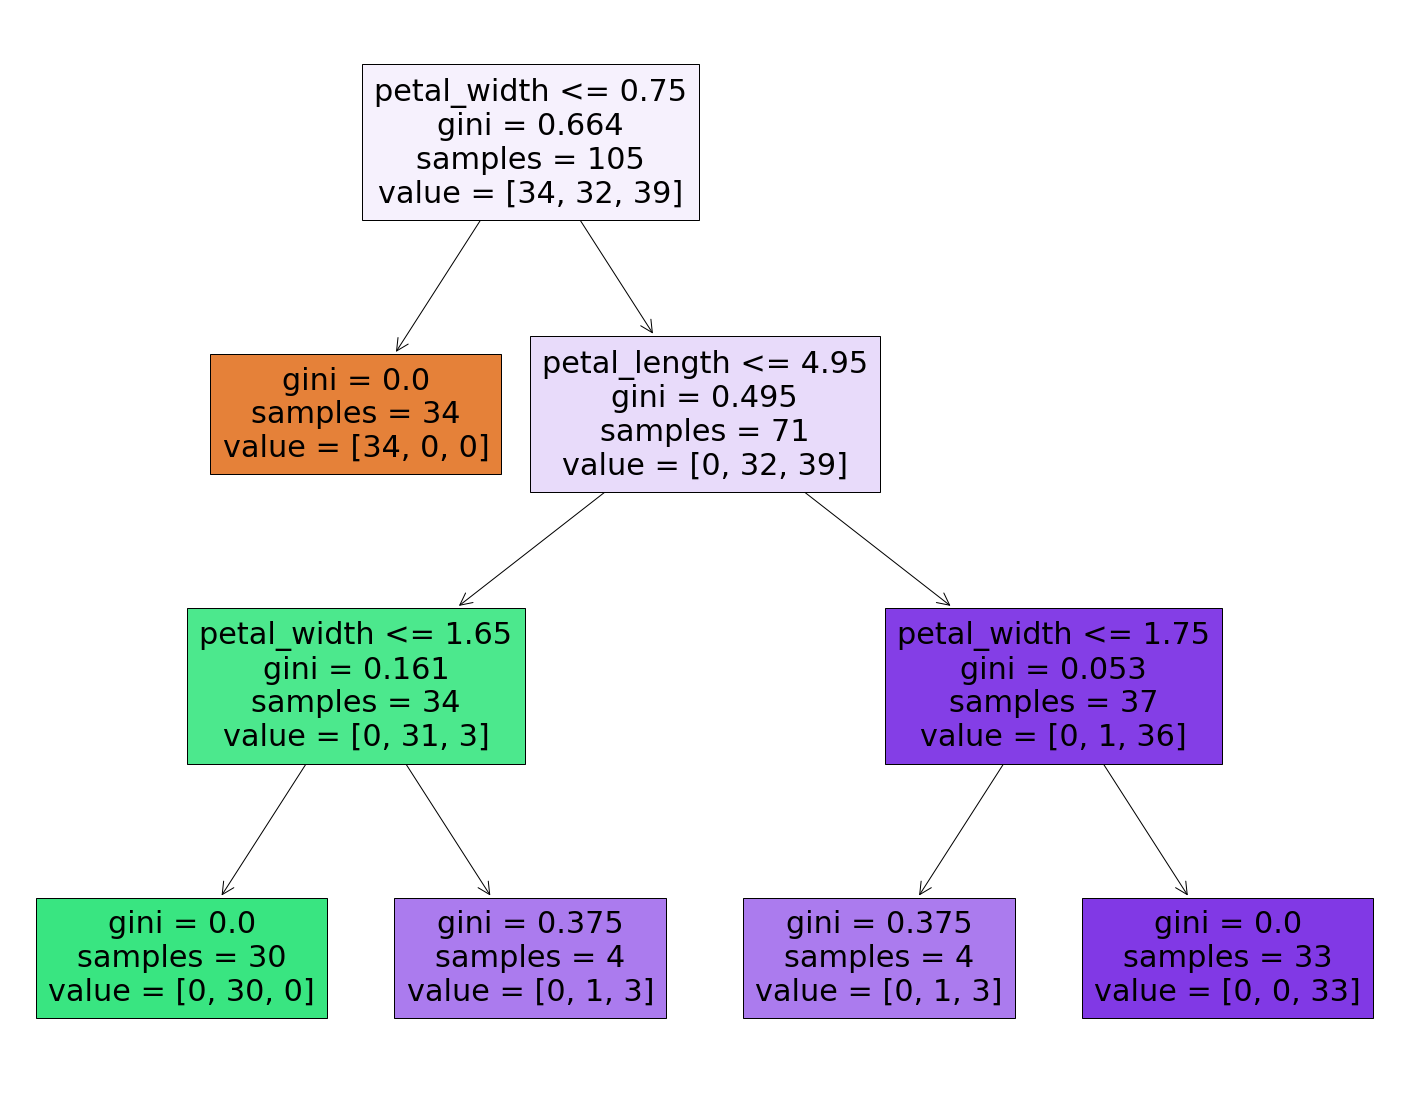

In [20]:
fig = plt.figure(figsize = (25, 20))
from sklearn.tree import plot_tree
plot_tree(dtc_md, feature_names = X.columns, filled = True)
plt.show()

# Using min_samples_split

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc_mss = DecisionTreeClassifier(min_samples_split = 10)
dtc_mss

DecisionTreeClassifier(min_samples_split=10)

In [22]:
dtc_mss.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [23]:
dtc_mss.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [24]:
y_pred_mss=dtc_mss.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_mss)

0.9777777777777777

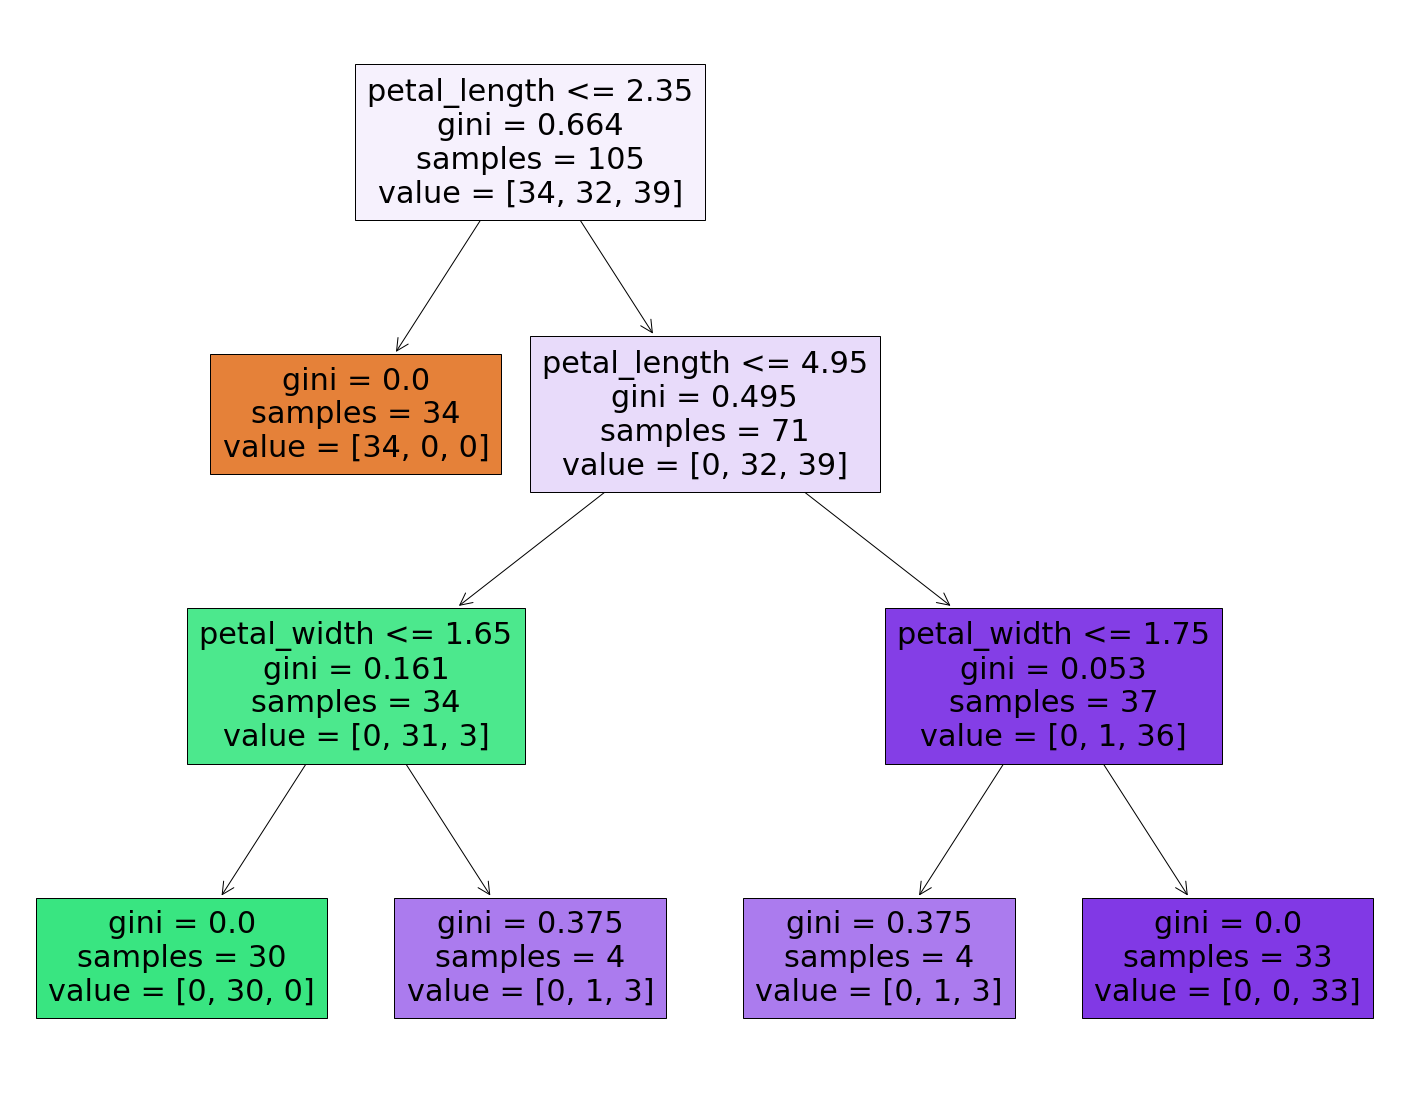

In [26]:
fig = plt.figure(figsize = (25, 20))
from sklearn.tree import plot_tree
plot_tree(dtc_mss, feature_names = X.columns, filled = True)
plt.show()